## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [2]:
data = pd.read_csv('train.csv')
data.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x204,7,Male,60-64,NaN,2010,81403,2016.0,34,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Shape of the data

In [3]:
data.shape

(2952, 70)

## Information summery about the features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             2952 non-null   object 
 1   tumor_cell_count       2952 non-null   int64  
 2   gender                 2952 non-null   object 
 3   age_group              2927 non-null   object 
 4   race                   2649 non-null   object 
 5   year_of_diagnosis      2952 non-null   int64  
 6   morphology_code        2952 non-null   int64  
 7   year_of_death          2550 non-null   float64
 8   smoke_units            2952 non-null   int64  
 9   area_code              2952 non-null   int64  
 10  alcohol_consume_units  2952 non-null   int64  
 11  symptoms               2952 non-null   object 
 12  symptom1               2952 non-null   float64
 13  symptom2               2952 non-null   float64
 14  symptom3               2952 non-null   float64
 15  symp

## Lets check some statistics

In [6]:
data.describe()

,tumor_cell_count,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptom1,symptom2,symptom3,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
count,2952.000000,2952.000000,2952.000000,2550.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,8.036924,2010.925136,80940.815718,2016.694118,14.992209,5.195799,3.258469,0.139566,0.021341,0.021680,...,0.026762,0.026423,0.026084,0.023713,0.019986,0.020325,0.019648,0.019986,0.024729,0.699526
std,24.840630,1.402237,1357.411378,1.745409,7.926741,2.459212,2.372024,0.346595,0.144544,0.145662,...,0.161413,0.160416,0.159412,0.152178,0.139977,0.141134,0.138810,0.139977,0.155324,0.458542
min,1.000000,2009.000000,80003.000000,2013.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2010.000000,80103.000000,2015.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2011.000000,80463.000000,2017.000000,15.000000,5.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,2012.000000,81403.000000,2018.000000,20.000000,8.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,323.000000,2013.000000,89803.000000,2020.000000,34.000000,10.000000,8.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.tail(2)

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
2950,TCBA-B8-0xf8c,1,Female,65-69,White,2009,80463,2016.0,20,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2951,TCBA-B8-0xeb,1,Male,70-74,White,2012,80103,2017.0,15,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
data.isnull().sum()

patient_id               0
tumor_cell_count         0
gender                   0
age_group               25
race                   303
                      ... 
symptom63                0
symptom64                0
symptom65                0
symptom66                0
death_due_to_cancer      0
Length: 70, dtype: int64

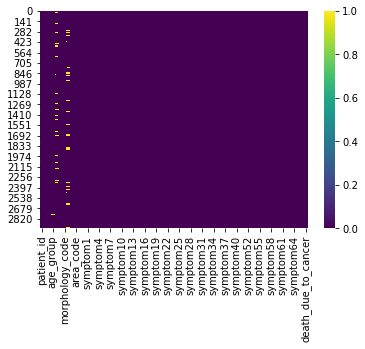

In [9]:
sns.heatmap(data.isnull(),cmap='viridis');

In [10]:
data.shape

(2952, 70)

In [11]:
data = data.dropna()
data.shape

(2271, 70)

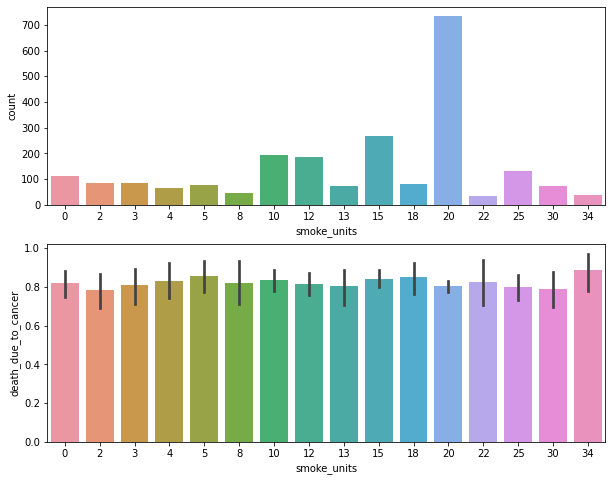

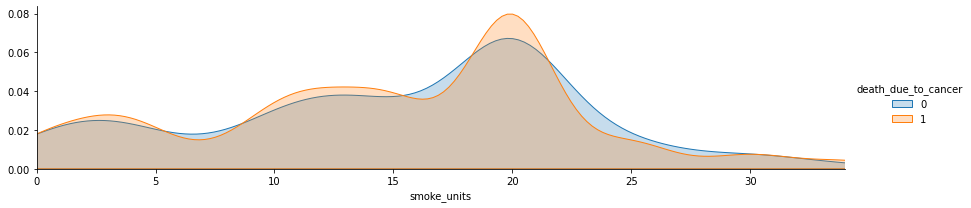

In [12]:
#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (10, 8))
sns.countplot(x = 'smoke_units', data = data, ax=ax1)
sns.barplot(x = 'smoke_units', y = 'death_due_to_cancer', data = data, ax=ax2) 

#continuous to categorical
facet = sns.FacetGrid(data, hue='death_due_to_cancer',aspect=4)
facet.map(sns.kdeplot,'smoke_units',shade= True)
facet.set(xlim=(0, data['smoke_units'].max()))
facet.add_legend()

In [13]:
type(data['year_of_death'])

pandas.core.series.Series

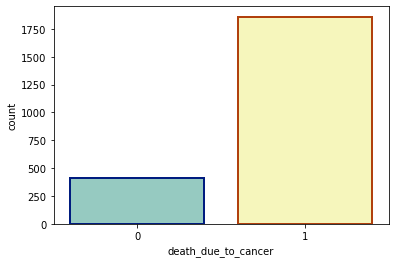

In [14]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot(data['death_due_to_cancer'],edgecolor=sns.color_palette('dark',3),linewidth=2,palette='Set3');

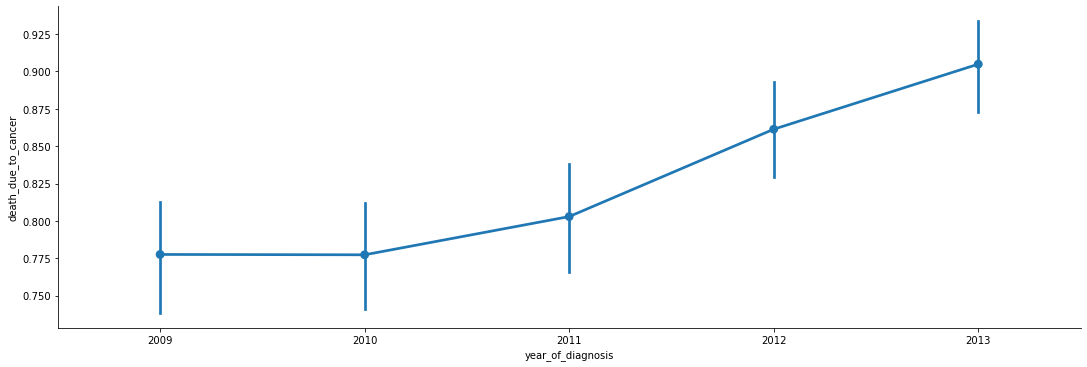

In [15]:
sns.factorplot('year_of_diagnosis','death_due_to_cancer',data = data, size=5, aspect=3)

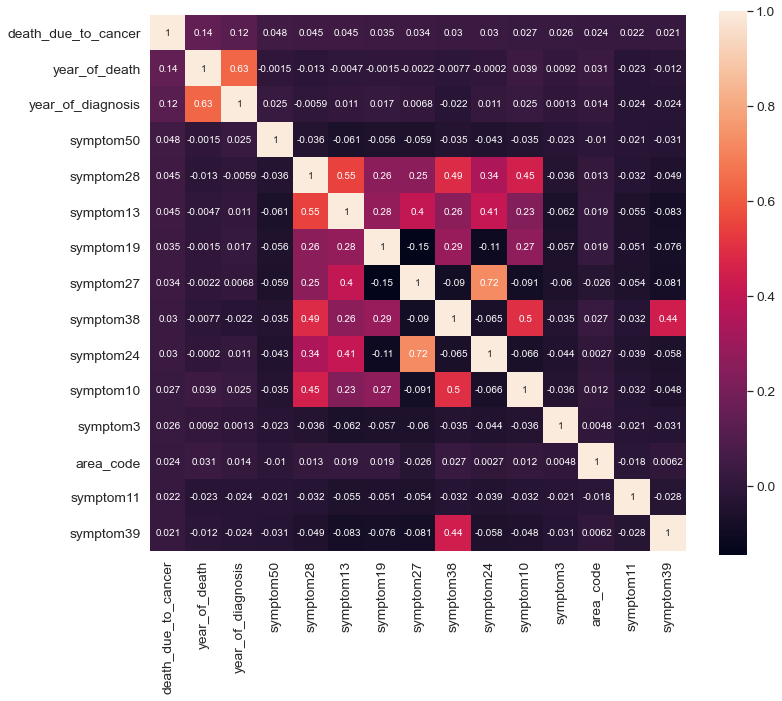

In [16]:
# list the heatmap of top correlation

corr = data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'death_due_to_cancer')['death_due_to_cancer'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [17]:
data['age_group'] = data['age_group'].str[:2]

In [18]:
data.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
1,TCBA-B8-0x1063,1,Male,85,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,TCBA-B8-0x12b9,1,Female,85,Asian,2011,80423,2017.0,25,2,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [21]:
data['year_of_death']

1       2016.0
2       2018.0
3       2018.0
4       2016.0
5       2017.0
         ...  
2944    2016.0
2947    2019.0
2949    2016.0
2950    2016.0
2951    2017.0
Name: year_of_death, Length: 2271, dtype: float64

In [22]:
data['age_group'] = data['age_group'].fillna(data['age_group'].median())
data['age_group'].isnull().any()



False

In [25]:
data.isnull().sum()

patient_id             0
tumor_cell_count       0
gender                 0
age_group              0
race                   0
                      ..
symptom63              0
symptom64              0
symptom65              0
symptom66              0
death_due_to_cancer    0
Length: 70, dtype: int64

In [26]:
data.columns

Index(['patient_id', 'tumor_cell_count', 'gender', 'age_group', 'race',
       'year_of_diagnosis', 'morphology_code', 'year_of_death', 'smoke_units',
       'area_code', 'alcohol_consume_units', 'symptoms', 'symptom1',
       'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'symptom7',
       'symptom8', 'symptom9', 'symptom10', 'symptom11', 'symptom12',
       'symptom13', 'symptom14', 'symptom15', 'symptom16', 'symptom17',
       'symptom18', 'symptom19', 'symptom20', 'symptom21', 'symptom22',
       'symptom23', 'symptom24', 'symptom25', 'symptom26', 'symptom27',
       'symptom28', 'symptom29', 'symptom30', 'symptom31', 'symptom32',
       'symptom33', 'symptom34', 'symptom35', 'symptom36', 'symptom37',
       'symptom38', 'symptom39', 'symptom40', 'symptom50', 'symptom51',
       'symptom52', 'symptom53', 'symptom54', 'symptom55', 'symptom56',
       'symptom57', 'symptom58', 'symptom59', 'symptom60', 'symptom61',
       'symptom62', 'symptom63', 'symptom64', 'symptom6

## Data Vizualization

<AxesSubplot:xlabel='alcohol_consume_units', ylabel='count'>

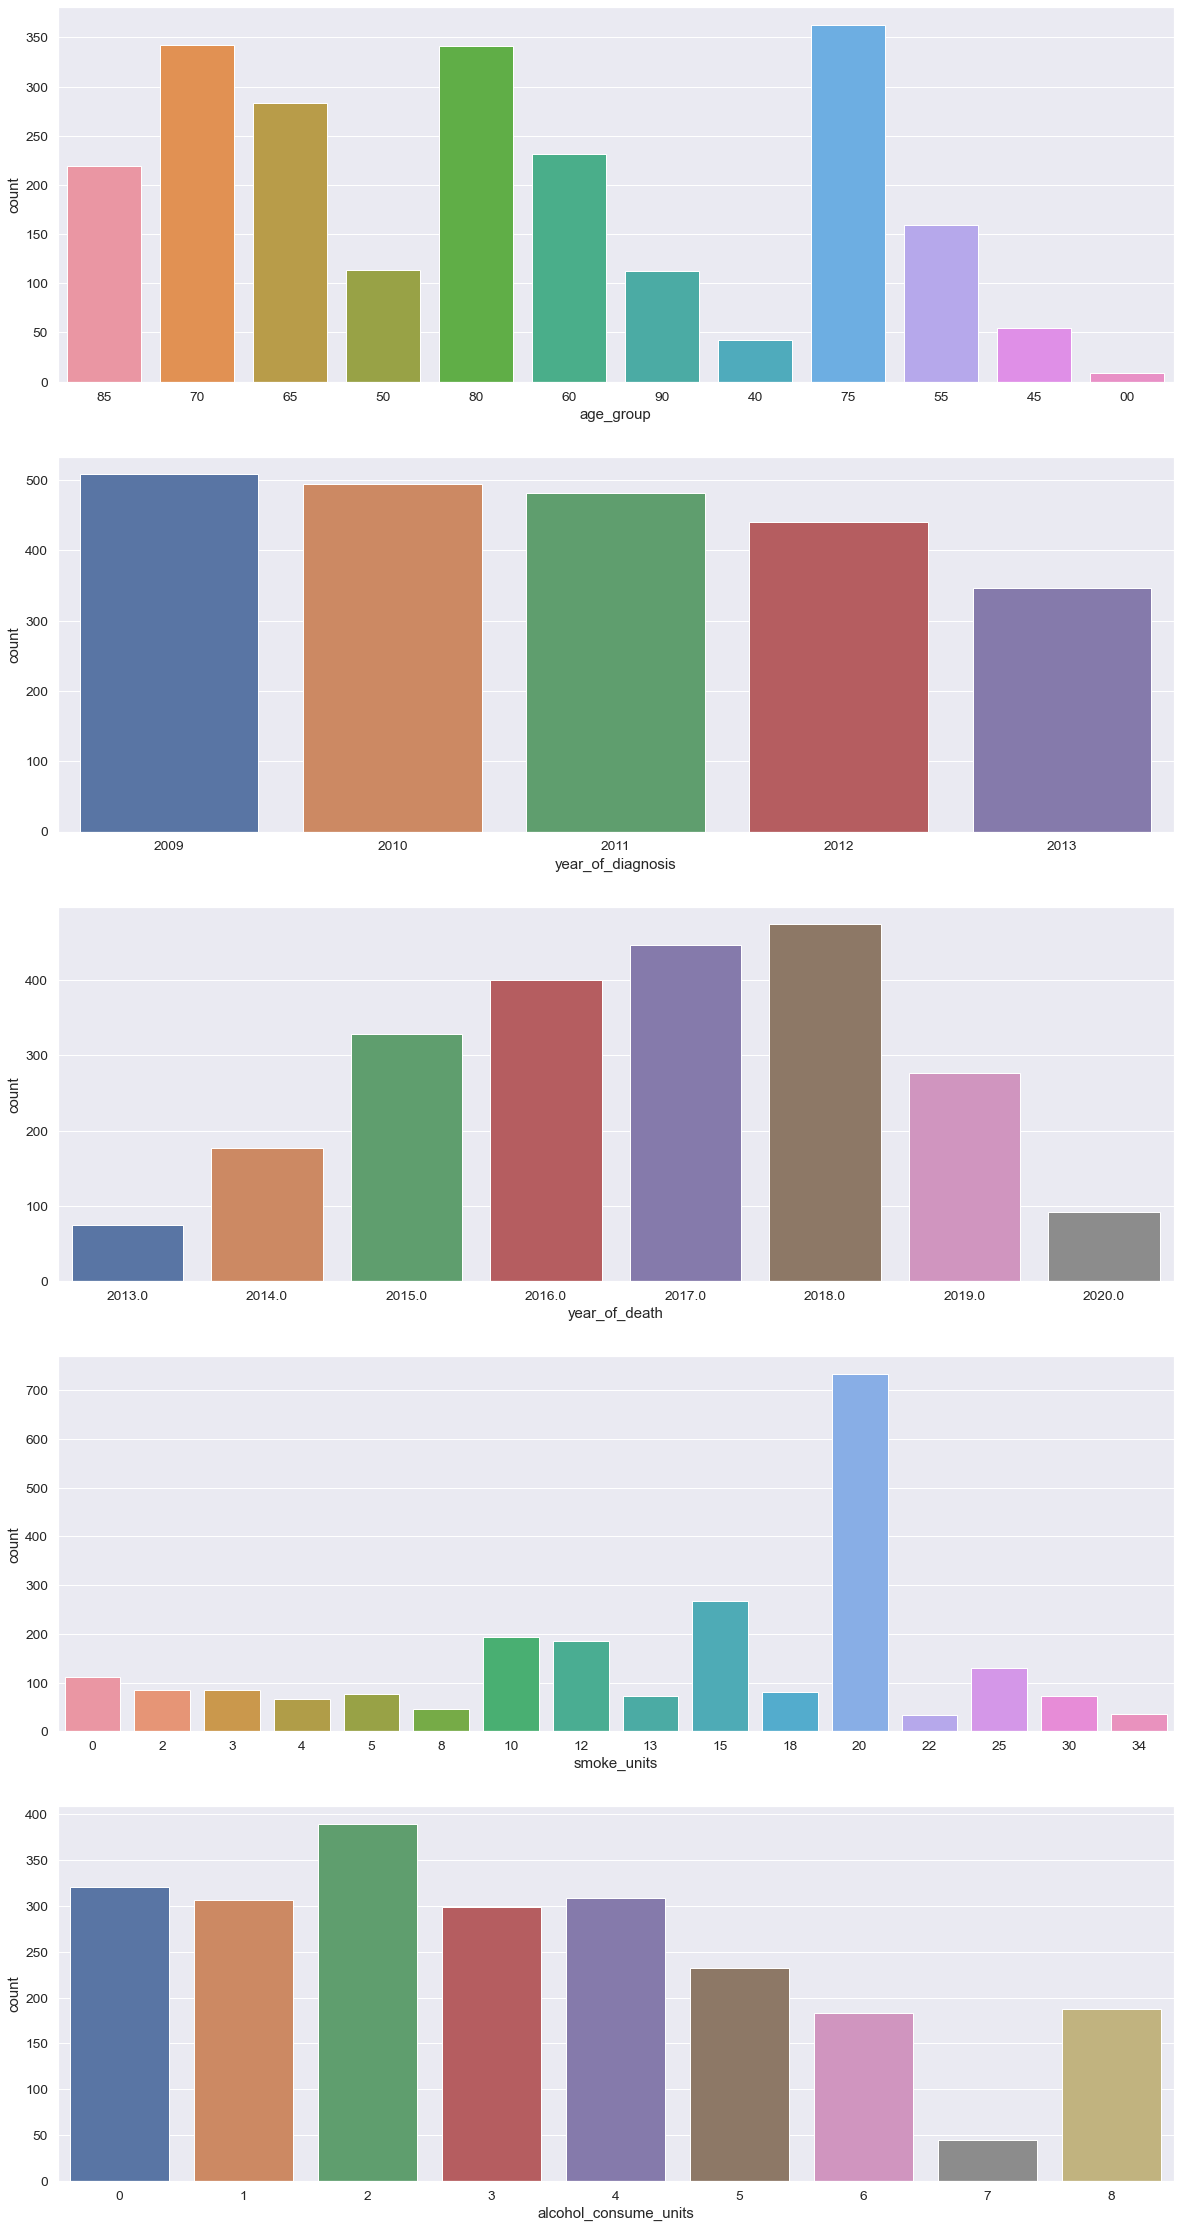

In [27]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize = (20,40))
sns.countplot(x='age_group', data=data, ax=ax1)
sns.countplot(x='year_of_diagnosis', data=data, ax=ax2)
sns.countplot(x='year_of_death', data=data, ax=ax3)
sns.countplot(x='smoke_units', data=data, ax=ax4)
sns.countplot(x='alcohol_consume_units', data=data, ax=ax5)

In [28]:
data2 = pd.read_csv('test.csv')
data2.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
0,TCBA-B8-0x7e9,1,Male,85-89,White,2009,80003,2014.0,25,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCBA-B8-0x6bc,1,Male,80-84,White,2013,82503,2020.0,12,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCBA-B8-0x1195,1,Male,60-64,White,2013,80703,2017.0,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCBA-B8-0x8a5,1,Male,85-89,White,2013,80103,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCBA-B8-0xa21,1,Male,85-89,White,2009,80003,NaN,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
1,TCBA-B8-0x1063,1,Male,85,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,TCBA-B8-0x12b9,1,Female,85,Asian,2011,80423,2017.0,25,2,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [34]:
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])


In [36]:
data.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
1,58,0,1,10,5,3,16,2016.0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1667,0,0,7,5,4,2,2018.0,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2231,87,0,6,5,4,16,2018.0,11,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1978,20,1,3,5,1,16,2016.0,11,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,358,0,0,10,0,2,12,2017.0,13,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [37]:

# splitting the dataset

X = data.drop(['death_due_to_cancer','patient_id'],axis=1)
Y = data['death_due_to_cancer']


In [38]:
X.shape

(2271, 68)

In [39]:
Y.shape

(2271,)

## Spliting the data

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
regressor =RandomForestRegressor()

In [44]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_sample_leaf = [1,2,5,10]

In [90]:
#Creating the random grid

random_grid = {'max_features':max_features,
              'max_depth' : max_depth,
             }

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30]}


In [91]:
rf =RandomForestRegressor()

In [92]:
#Random search of parameters,

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,scoring = 'neg_mean_squared_error',
                              n_iter = 10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [93]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=auto, max_depth=30 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. max_features=auto, max_depth=30, total=   1.3s
[CV] max_features=auto, max_depth=30 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................. max_features=auto, max_depth=30, total=   1.1s
[CV] max_features=auto, max_depth=30 .................................
[CV] .................. max_features=auto, max_depth=30, total=   1.2s
[CV] max_features=auto, max_depth=30 .................................
[CV] .................. max_features=auto, max_depth=30, total=   1.1s
[CV] max_features=auto, max_depth=30 .................................
[CV] .................. max_features=auto, max_depth=30, total=   1.1s
[CV] max_features=sqrt, max_depth=25 .................................
[CV] .................. max_features=sqrt, max_depth=25, total=   0.4s
[CV] max_features=sqrt, max_depth=25 .................................
[CV] .................. max_features=sqrt, max_depth=25, total=   0.4s
[CV] max_features=sqrt, max_depth=25 .................................
[CV] .................. max_features=sqrt, max_depth=25, total=   0.4s
[CV] max_features=sqrt, max_depth=25 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_

{'max_features': 'auto', 'max_depth': 5}

In [95]:
rf_random.best_score_

-0.12497494692091515

In [96]:
predictions = rf_random.predict(X_test)

<AxesSubplot:xlabel='death_due_to_cancer', ylabel='Density'>

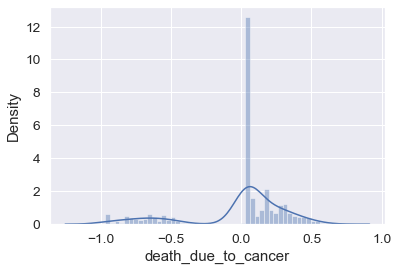

In [118]:
sns.distplot(Y_test-predictions)

In [113]:
from sklearn import metrics

In [116]:
print('MAE:',metrics.mean_absolute_error(Y_test,predictions))
print('MSE:',metrics.mean_squared_error(Y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE: 0.2410068924568383
MSE: 0.12231961631562288
RMSE: 0.34974221408863826


## Using SVC

In [127]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# creating the model
model = SVC()

# feeding the training data into the model
model.fit(X_train, Y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, y_pred))

# confusion matrix 
print(confusion_matrix(Y_test, y_pred))


Training accuracy : 0.8193832599118943
Testing accuracy : 0.8167155425219942
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.82      1.00      0.90       557

    accuracy                           0.82       682
   macro avg       0.41      0.50      0.45       682
weighted avg       0.67      0.82      0.73       682

[[  0 125]
 [  0 557]]


In [130]:
data2

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
0,TCBA-B8-0x7e9,1,Male,85-89,White,2009,80003,2014.0,25,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCBA-B8-0x6bc,1,Male,80-84,White,2013,82503,2020.0,12,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCBA-B8-0x1195,1,Male,60-64,White,2013,80703,2017.0,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCBA-B8-0x8a5,1,Male,85-89,White,2013,80103,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCBA-B8-0xa21,1,Male,85-89,White,2009,80003,NaN,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,TCBA-B8-0xc5f,1,Female,70-74,White,2010,82503,2019.0,15,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965,TCBA-B8-0x267,1,Male,75-79,White,2010,81403,2016.0,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,TCBA-B8-0xce9,1,Female,80-84,White,2013,81403,2018.0,10,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1967,TCBA-B8-0xc20,1,Female,50-54,OtherEth,2013,80463,2018.0,10,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
